In [1]:
import torch
from random import sample

import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

from dataset import PHEME
from utils import step, plot

/home/ag/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/home/ag/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
pheme = PHEME('pheme')

In [ ]:
6421 3758 5670 2802

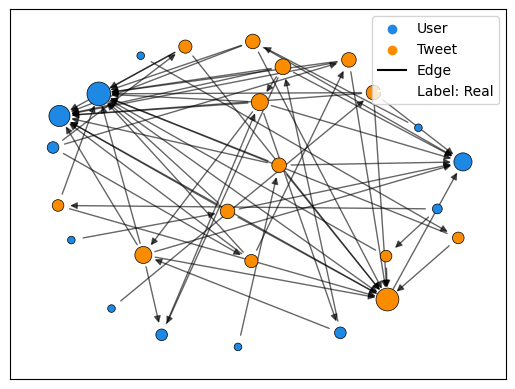

In [32]:
G = to_networkx(pheme[5670])
layout = nx.spring_layout(
    G, k=2, scale=2
)

plot(
    G=G, color_mapping=color_mapping, 
    layout=layout, 
    label='Real' if pheme[i].y == 0 else 'Fake', 
    node_size=10
)

6421
3758
5670
2802


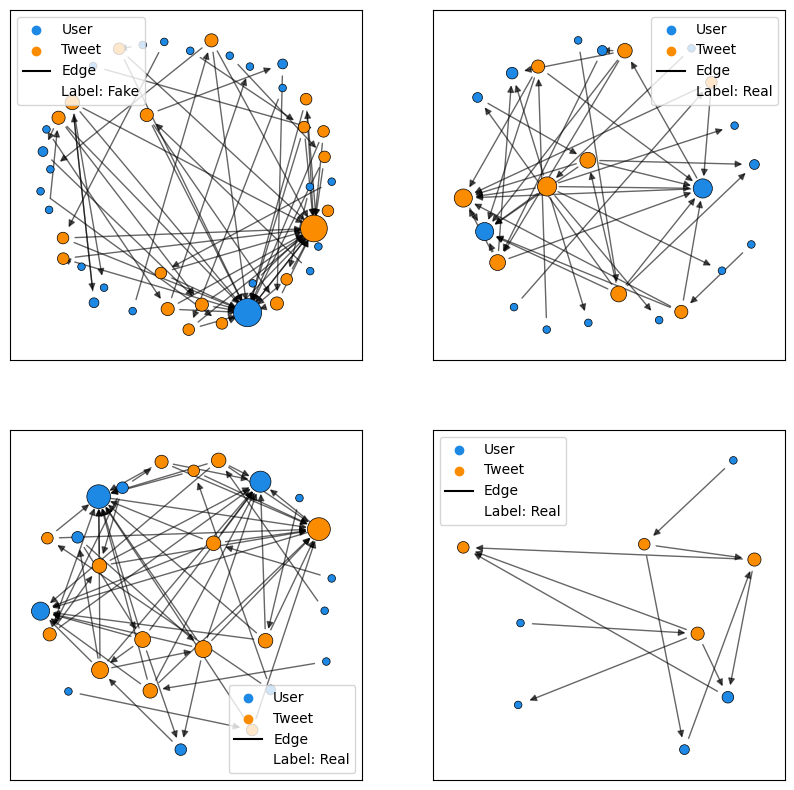

In [33]:
from random import sample

color_mapping = {'user': '#1E88E5', 'tweet': '#FB8C00'}
n = 1
plt.figure(figsize=(10, 10))

for i in [6421, 3758, 5670, 2802]:

    print(i)
    
    plt.subplot(2, 2, n)

    G = to_networkx(pheme[i])
    layout = nx.spring_layout(
        G, k=2, scale=2
    )

    plot(
        G=G, color_mapping=color_mapping, 
        layout=layout, 
        label='Real' if pheme[i].y == 0 else 'Fake', 
        node_size=10
    )
    n += 1
plt.show()

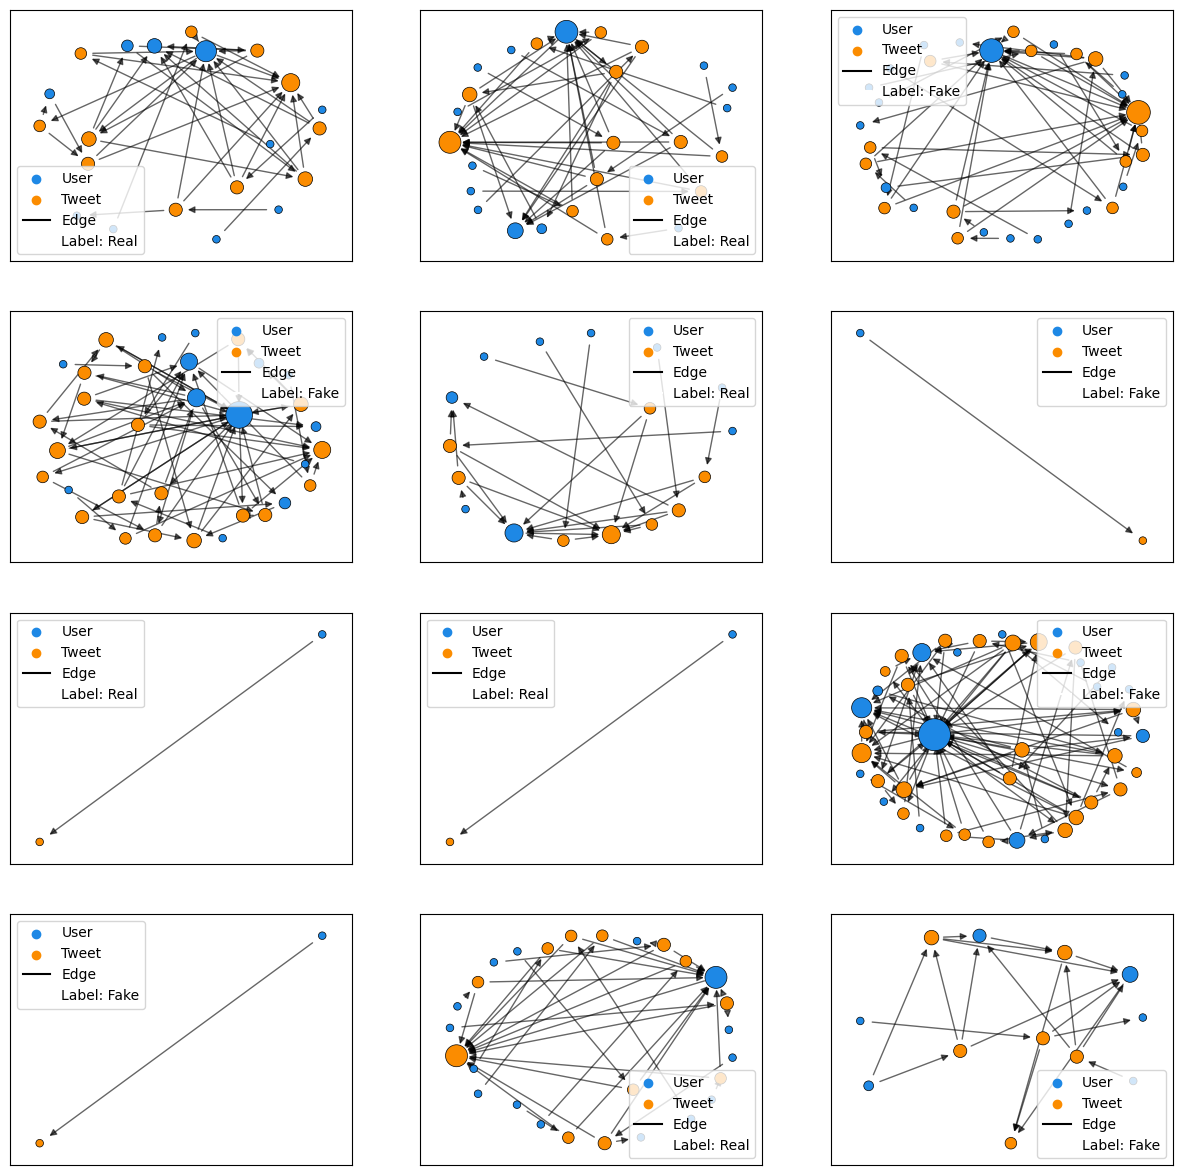

In [11]:
from random import sample

color_mapping = {'user': '#1E88E5', 'tweet': '#FB8C00'}
n = 1
plt.figure(figsize=(15, 15))

for i in sample(range(len(pheme)), 12):
    
    plt.subplot(4, 3, n)

    G = to_networkx(pheme[i])
    layout = nx.spring_layout(
        G, k=2, scale=2
    )

    plot(
        G=G, color_mapping=color_mapping, 
        layout=layout, 
        label='Real' if pheme[i].y == 0 else 'Fake', 
        node_size=10
    )
    n += 1
plt.show()

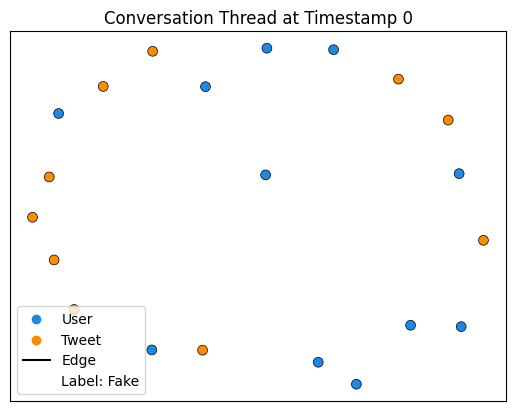

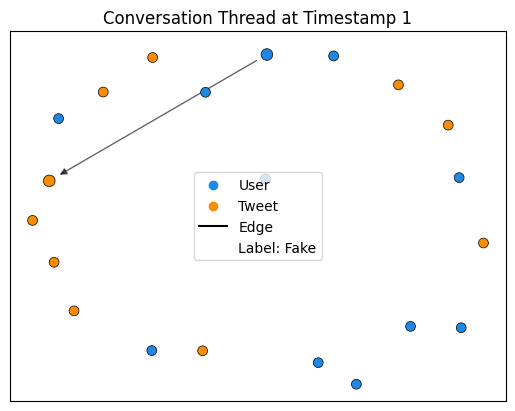

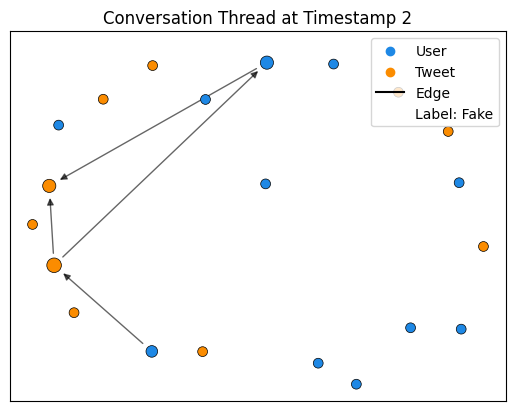

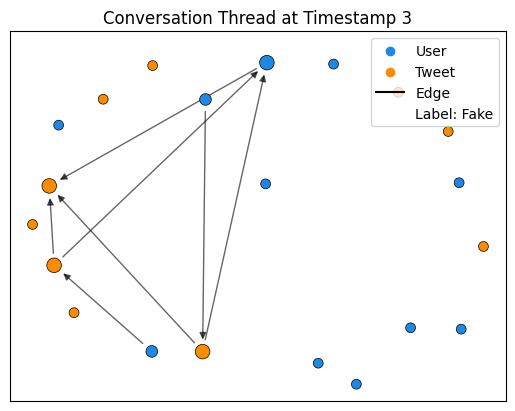

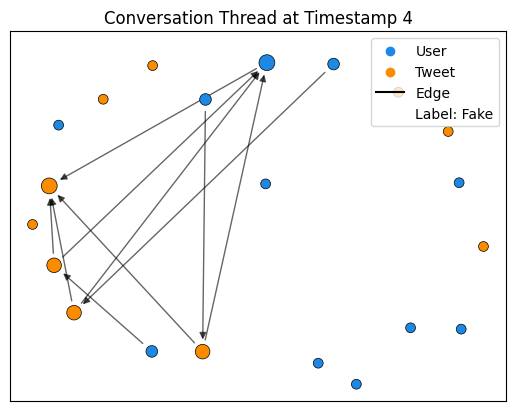

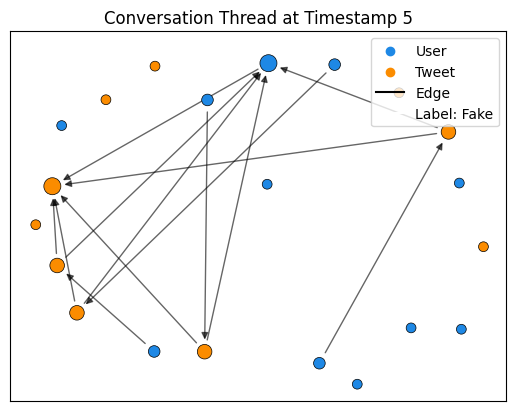

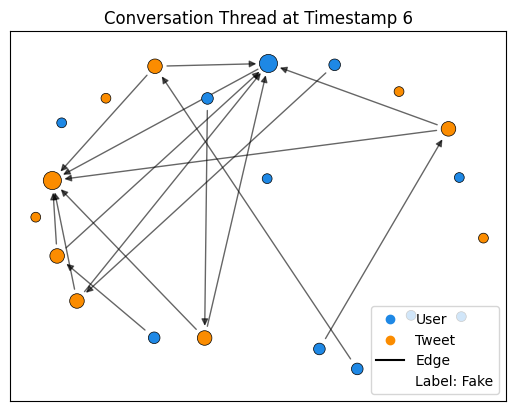

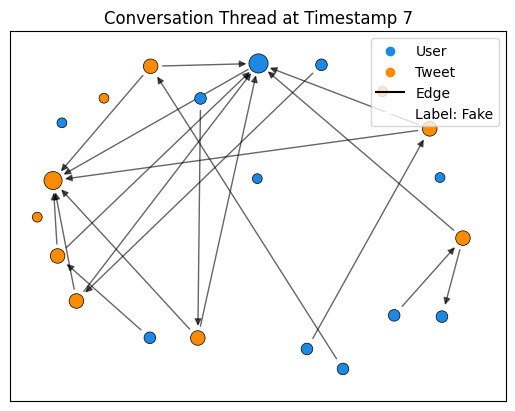

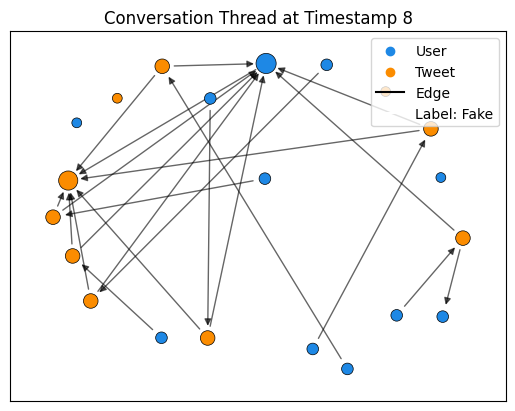

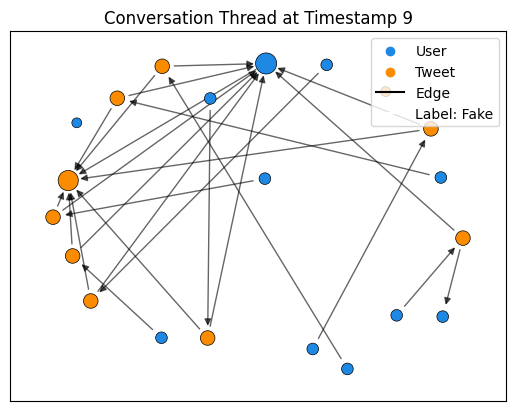

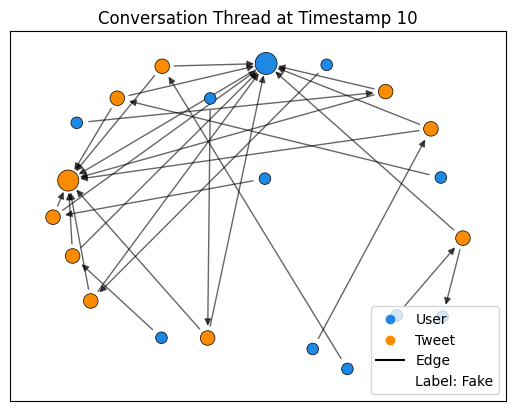

In [4]:
data = pheme[1532]

color_mapping = {'user': '#1E88E5', 'tweet': '#FB8C00'}
layout = nx.spring_layout(
    to_networkx(data), 
    k=2, scale=2
)

for t in range(data.timesteps[0] + 1):

    G = to_networkx(
        step(data=data, t=t)
    )

    plot(
        G=G, color_mapping=color_mapping, 
        layout=layout, 
        label='Real' if data.y == 0 else 'Fake'
    )

    plt.title(f"Conversation Thread at Timestamp {t}")
    plt.show()

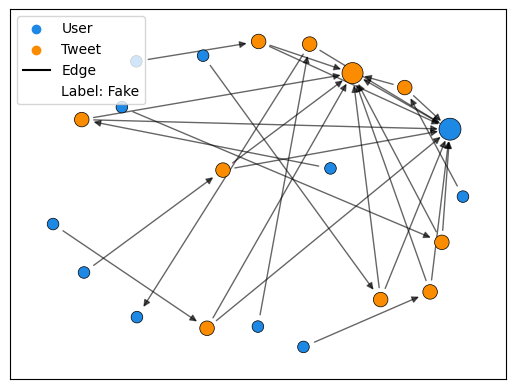

In [5]:
data = pheme[1532]

color_mapping = {'user': '#1E88E5', 'tweet': '#FB8C00'}
layout = nx.spring_layout(
    to_networkx(data), 
    k=2, scale=2, seed=0
)


G = to_networkx(
    step(data=data, t=t)
)

plot(G, color_mapping=color_mapping, layout=layout, label='Real' if data.y == 0 else 'Fake')

plt.show()

In [6]:
len(pheme)

6425

In [7]:
stats = {}
for data in pheme:

    if data.event not in stats:

        stats[data.event] = {
            'real': 0,
            'fake': 0,
            'tweets': 0,
            'users': 0
        }

    if data.y == 0:
        stats[data.event]['real'] += 1
    else:
        stats[data.event]['fake'] += 1

    stats[data.event]['users'] += data['user'].x.size(0)
    stats[data.event]['tweets'] += data['tweet'].x.size(0)

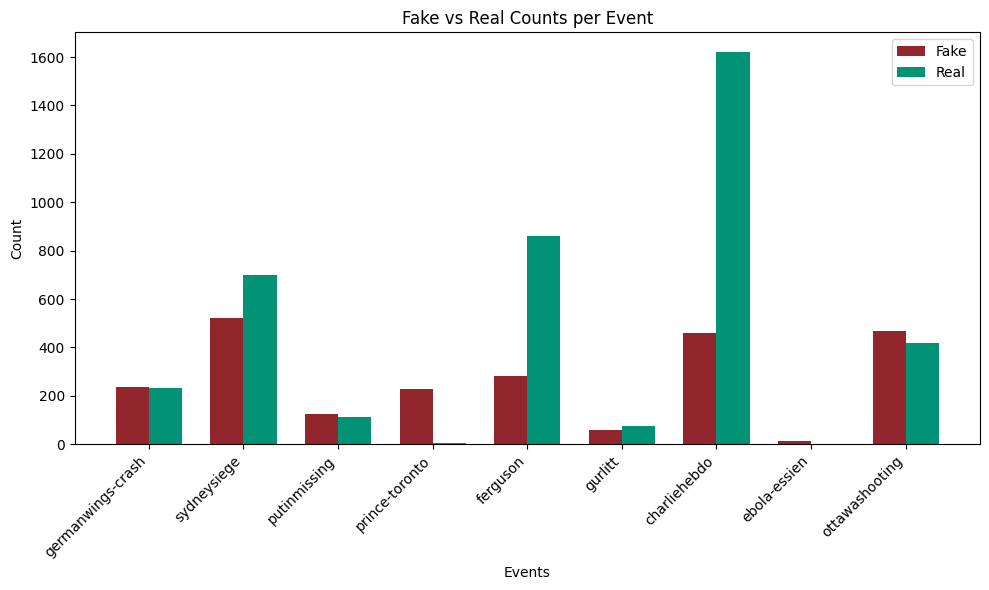

In [8]:
import numpy as np

categories = list(stats.keys())
fake_counts = [stats[cat]['fake'] for cat in categories]
real_counts = [stats[cat]['real'] for cat in categories]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, fake_counts, width, label='Fake', color='#91272d')
ax.bar(x + width/2, real_counts, width, label='Real', color='#029376')

ax.set_xlabel('Events')
ax.set_ylabel('Count')
ax.set_title('Fake vs Real Counts per Event')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

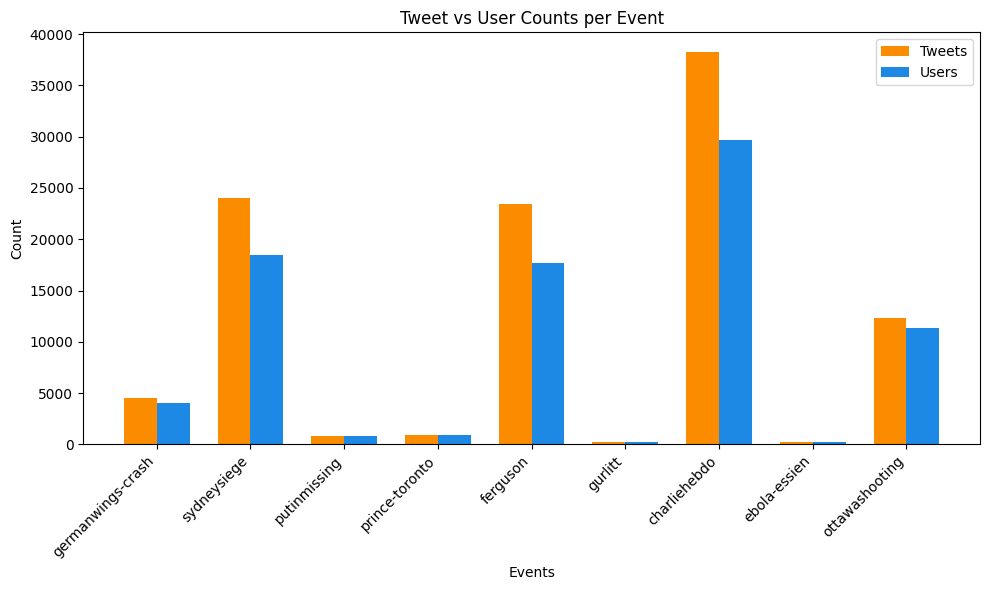

In [9]:
categories = list(stats.keys())
tweet_counts = [stats[cat]['tweets'] for cat in categories]
user_counts = [stats[cat]['users'] for cat in categories]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, tweet_counts, width, label='Tweets', color=color_mapping['tweet'])
ax.bar(x + width/2, user_counts, width, label='Users', color=color_mapping['user'])

ax.set_xlabel('Events')
ax.set_ylabel('Count')
ax.set_title('Tweet vs User Counts per Event')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

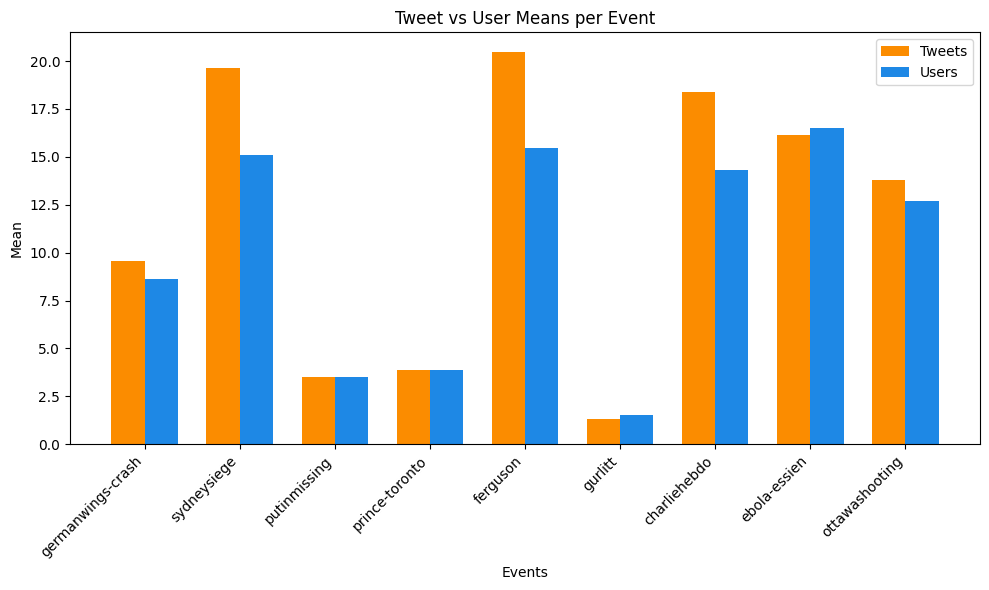

In [10]:
categories = list(stats.keys())
tweet_means = [
    stats[cat]['tweets'] / (stats[cat]['fake'] + stats[cat]['real']) 
    for cat in categories
]
user_means = [
    stats[cat]['users'] / (stats[cat]['fake'] + stats[cat]['real']) 
    for cat in categories
]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, tweet_means, width, label='Tweets', color=color_mapping['tweet'])
ax.bar(x + width/2, user_means, width, label='Users', color=color_mapping['user'])

ax.set_xlabel('Events')
ax.set_ylabel('Mean')
ax.set_title('Tweet vs User Means per Event')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

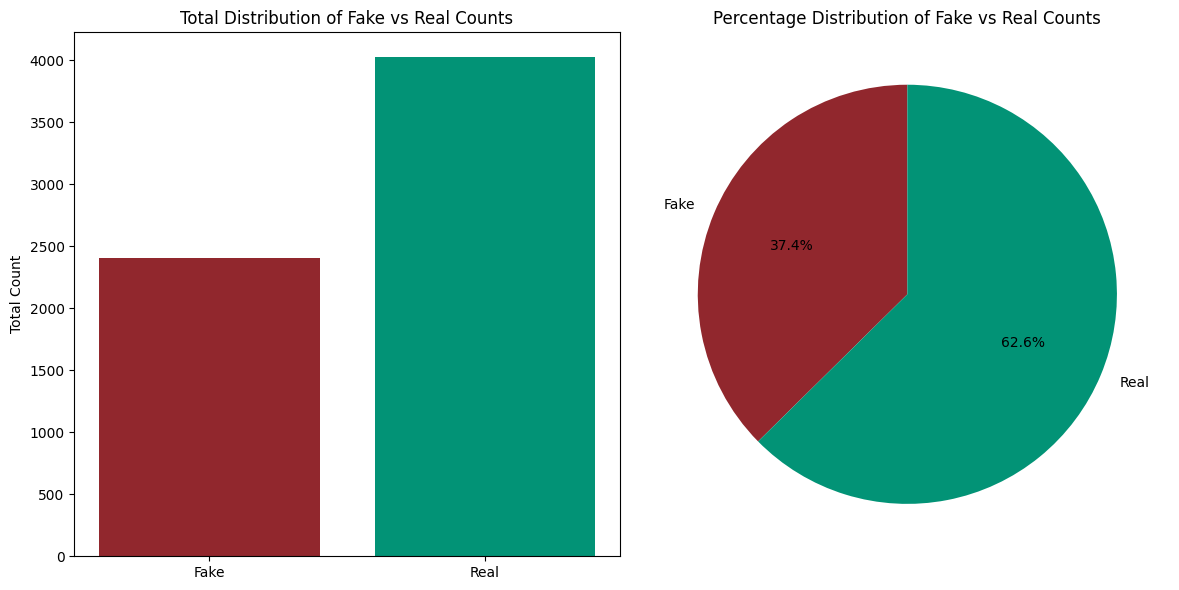

In [11]:
total_fake = sum(fake_counts)
total_real = sum(real_counts)

totals = [total_fake, total_real]
labels = ['Fake', 'Real']
colors = ['#91272d', '#029376']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.bar(labels, totals, color=colors)
ax1.set_ylabel('Total Count')
ax1.set_title('Total Distribution of Fake vs Real Counts')

ax2.pie(totals, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, )
ax2.set_title('Percentage Distribution of Fake vs Real Counts')

plt.tight_layout()
plt.show()


In [10]:
import os, json
from math import inf

In [33]:
tokens = 0
tweets = 0
Min = inf
Min_text = ''
Max = -inf

for tweet_id in os.listdir('PersianTweet'):
    tweet = json.load(open(f'PersianTweet/{tweet_id}/source-tweets/{tweet_id}.json'))
    token = len(tweet['text'].split(' '))
    if token < Min:
        Min = token
        Min_text = reaction['text']
    if token > Max:
        Max = token
    tokens += token
    tweets +=1

    if not os.path.exists(f"PersianTweet/{tweet_id}/reactions"):
        continue

    for reaction_path in os.listdir(f"PersianTweet/{tweet_id}/reactions"):

        reaction = json.load(open(f'PersianTweet/{tweet_id}/reactions/{reaction_path}'))
        token = len(reaction['text'].replace('_', ' ').split(' '))
        if token < Min:
            Min = token
            Min_text = reaction['text']
        if token > Max:
            Max = token
        tokens += token
        tweets +=1


In [34]:
tokens / tweets

18.722246290479802

In [35]:
Min

1

In [37]:
Min_text

'https://t.co/8fH1BGn6pb'

In [38]:
Max

523

In [47]:
tokens = 0
tweets = 0
Min = inf
Min_text = ''
Max = -inf

data_path = 'pheme/raw/PHEME'

for event in os.listdir(data_path):
    if event.startswith('.') or event.endswith('.json'):
        continue
    for roumority in os.listdir(data_path + '/' + event):
        if roumority.startswith('.'):
            continue
        for tweet_id in os.listdir(data_path + '/' + event + '/' + roumority):
            if tweet_id.startswith('.'):
                continue


            tweet = json.load(open(f'{data_path}/{event}/{roumority}/{tweet_id}/source-tweets/{tweet_id}.json'))
            token = len(tweet['text'].split(' '))
            if token < Min:
                Min = token
                Min_text = reaction['text']
            if token > Max:
                Max = token
            tokens += token
            tweets +=1

            if not os.path.exists(f'{data_path}/{event}/{roumority}/{tweet_id}/reactions'):
                continue

            for reaction_path in os.listdir(f'{data_path}/{event}/{roumority}/{tweet_id}/reactions'):
                if reaction_path.startswith('.'):
                    continue

                reaction = json.load(open(f'{data_path}/{event}/{roumority}/{tweet_id}/reactions/{reaction_path}'))
                token = len(reaction['text'].replace('_', ' ').split(' '))
                if token < Min:
                    Min = token
                    Min_text = reaction['text']
                if token > Max:
                    Max = token
                tokens += token
                tweets +=1


In [48]:
tokens / tweets

14.364381039163202

In [49]:
Min

1

In [50]:
Min_text

'@HuffingtonPost'

In [51]:
Max

64